In [1]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import yfinance
import matplotlib.pyplot as plt
import time
import scipy.stats as st

In [2]:
df = pd.DataFrame()
df = df.ta.ticker("spy")
df["newDate"] = df.index
df = df[df["newDate"] >= "2000-01-01"]
del df["newDate"]
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03,99.392272,99.392272,96.459110,97.506668,8164300,0.0,0
2000-01-04,96.228663,96.584833,93.620244,93.693573,8089800,0.0,0
2000-01-05,93.819273,94.887782,92.017474,93.861176,12177900,0.0,0
2000-01-06,93.609745,94.866815,92.352676,92.352676,6227200,0.0,0
2000-01-07,94.070708,97.716209,93.903098,97.716209,8066500,0.0,0
...,...,...,...,...,...,...,...
2021-08-16,444.529999,447.109985,442.869995,446.970001,73740000,0.0,0
2021-08-17,444.239990,444.959991,440.850006,444.040009,92673900,0.0,0
2021-08-18,442.959991,444.630005,438.920013,439.179993,89351900,0.0,0


In [3]:
newcurrmonies = []
length=30
sigma=5
do=0.9
offset=90
df2 = df.ta.alma(length=length,sigma=sigma,distribution_offset=do,offset=offset)
mylength = length+1
currmoney = df["Close"][df.index[mylength+1]]
lastalma = df2[df.index[mylength]]
lastclose = currmoney
goingUp = True
for date in df.index[mylength+1:]:
    if goingUp:
        currmoney *= df["Close"][date] / lastclose
        print(date, currmoney)
    newcurrmonies += [currmoney]
    lastclose = df["Close"][date]
    goingUp = df2[date] >= lastalma
    lastalma = df2[date]

2000-02-17 00:00:00 92.70887756347656
2000-06-28 00:00:00 92.96831781513409
2000-06-29 00:00:00 92.09014391655293
2000-07-17 00:00:00 91.93791900167065
2000-07-19 00:00:00 91.19936374337557
2000-07-20 00:00:00 92.46544854088546
2000-07-21 00:00:00 90.66218524849847
2000-08-10 00:00:00 90.22020603261048
2000-08-11 00:00:00 90.64294514556171
2000-08-14 00:00:00 91.79593077127849
2000-08-15 00:00:00 91.71905392132491
2000-08-16 00:00:00 91.39234819947058
2000-08-17 00:00:00 92.35316259075178
2000-08-18 00:00:00 92.04573875273091
2000-08-21 00:00:00 92.54534775215295
2000-08-22 00:00:00 92.39163583314252
2000-08-23 00:00:00 92.75675212604251
2000-08-24 00:00:00 93.04498460550613
2000-08-25 00:00:00 93.00657403446048
2000-08-28 00:00:00 93.3236353326567
2000-08-29 00:00:00 93.34288239907623
2000-08-30 00:00:00 92.44930043409047
2000-08-31 00:00:00 93.67912112886411
2000-09-01 00:00:00 93.77522415478887
2000-09-05 00:00:00 93.025723612121
2000-09-06 00:00:00 91.96885493929454
2000-09-07 00:0

2006-04-07 00:00:00 123.76607664930512
2006-04-10 00:00:00 123.95718999617675
2006-04-11 00:00:00 122.90619999911667
2006-04-12 00:00:00 123.1354984627116
2006-04-13 00:00:00 122.97304371793561
2006-04-17 00:00:00 122.92528267520173
2006-04-18 00:00:00 124.87439373283307
2006-04-19 00:00:00 125.11322859333225
2006-04-20 00:00:00 125.2851999704593
2006-04-21 00:00:00 125.30428264654438
2006-04-24 00:00:00 125.0750138297792
2006-04-25 00:00:00 124.55907005156828
2006-04-26 00:00:00 124.58770888911076
2006-04-27 00:00:00 125.18969764954471
2006-04-28 00:00:00 125.61005016635177
2006-05-01 00:00:00 124.58770888911076
2006-05-02 00:00:00 125.52406447778826
2006-05-03 00:00:00 125.05593115369415
2006-05-04 00:00:00 125.50495215487342
2006-05-05 00:00:00 126.6132593561248
2006-05-08 00:00:00 126.4603805373594
2006-05-09 00:00:00 126.70879132386915
2006-05-10 00:00:00 126.64193772277362
2006-05-11 00:00:00 125.11322859333227
2006-05-12 00:00:00 123.47943133468915
2006-05-15 00:00:00 123.727861

2011-03-14 00:00:00 161.7615243141415
2011-03-15 00:00:00 159.9081689710317
2011-03-16 00:00:00 156.9478170194793
2011-03-17 00:00:00 159.02503102920397
2011-03-18 00:00:00 159.6034316577626
2011-03-21 00:00:00 162.07700814884237
2011-03-22 00:00:00 161.51477392508406
2011-03-23 00:00:00 161.97701421460883
2011-03-24 00:00:00 163.52605184832325
2011-03-25 00:00:00 164.02580006189086
2011-03-28 00:00:00 163.6260341268936
2011-03-29 00:00:00 164.7253613089782
2011-03-30 00:00:00 165.86217310377927
2011-03-31 00:00:00 165.63727708314332
2011-04-01 00:00:00 166.33683833023065
2011-04-04 00:00:00 166.47427025452808
2011-04-05 00:00:00 166.44929216838023
2011-04-06 00:00:00 166.97400681243255
2011-04-07 00:00:00 166.54925113562427
2011-04-08 00:00:00 165.9745919749394
2011-04-11 00:00:00 165.4749136953507
2011-04-12 00:00:00 164.23814293330554
2011-04-13 00:00:00 164.22562475107372
2011-04-14 00:00:00 164.35059677145512
2011-04-15 00:00:00 164.95022236262471
2011-04-18 00:00:00 163.101331138

2014-10-09 00:00:00 309.79508190093406
2014-10-10 00:00:00 306.2589771036047
2014-10-13 00:00:00 301.2280836483405
2014-10-14 00:00:00 301.6942197444185
2014-10-15 00:00:00 299.6528198930642
2014-10-16 00:00:00 299.39571256057314
2014-10-17 00:00:00 302.9317894539159
2014-10-20 00:00:00 305.87309287297535
2014-10-21 00:00:00 311.9328342180026
2014-10-22 00:00:00 309.7147742275121
2014-10-23 00:00:00 313.3150860979977
2014-10-24 00:00:00 315.7261021557961
2014-10-27 00:00:00 315.2920835482896
2014-10-28 00:00:00 318.9086076349872
2014-10-29 00:00:00 318.42634303465707
2014-10-30 00:00:00 320.4676870780382
2014-10-31 00:00:00 324.132345541613
2014-11-03 00:00:00 324.30914520068217
2014-11-04 00:00:00 323.1841122691244
2014-11-05 00:00:00 325.2254005045323
2014-11-06 00:00:00 326.5272330951592
2014-11-07 00:00:00 326.83264222844707
2014-11-10 00:00:00 327.86129479030393
2014-11-11 00:00:00 328.1828045238574
2014-11-12 00:00:00 327.8292331097057
2014-11-13 00:00:00 328.1988493161498
2014-1

2018-10-15 00:00:00 503.74085594419125
2018-10-16 00:00:00 514.7555762367346
2018-10-17 00:00:00 514.8474195402589
2018-10-18 00:00:00 507.4124097504015
2018-10-19 00:00:00 507.13711533547854
2018-10-22 00:00:00 504.8606966341504
2018-10-23 00:00:00 502.29055598328193
2018-10-24 00:00:00 487.071914530606
2018-10-25 00:00:00 495.81024555877747
2018-10-26 00:00:00 487.09025375435465
2018-10-29 00:00:00 484.3916502263772
2018-10-30 00:00:00 491.5695282033227
2018-10-31 00:00:00 496.81993315842004
2018-11-01 00:00:00 502.1070459979709
2018-11-02 00:00:00 499.1330891811579
2018-11-05 00:00:00 501.88679869124996
2018-11-06 00:00:00 505.06263415407886
2018-11-07 00:00:00 515.8754758006062
2018-11-08 00:00:00 514.9391450959581
2018-11-09 00:00:00 509.9091935062754
2018-11-12 00:00:00 500.3813338743135
2018-11-13 00:00:00 499.44517979140295
2018-11-14 00:00:00 496.0306694872358
2018-11-15 00:00:00 501.2075114886449
2018-11-16 00:00:00 502.51097991174026
2018-11-19 00:00:00 494.0111765401257
201

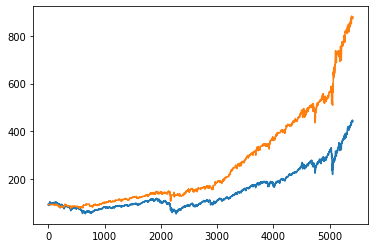

In [4]:
x = [i for i in range(len(newcurrmonies))]
y1 = list(df["Close"])[mylength+1:]
y2 = newcurrmonies
plt.plot(x,y1)
plt.plot(x,y2)